In [2]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("../scraper/arxiv_small.csv")

In [4]:
target_categories = ["hep-th", "hep-ph", "gr-qc"]
X = df['abstract']
y = df['primary_category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

In [6]:
vectorizer = TfidfVectorizer(
    max_features=10000,  
    ngram_range=(1, 2), 
    stop_words='english'
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
svm_clf = LinearSVC(class_weight='balanced', max_iter=5000, random_state=42)
svm_clf.fit(X_train_tfidf, y_train)

LinearSVC(class_weight='balanced', max_iter=5000, random_state=42)

In [8]:
y_pred = svm_clf.predict(X_test_tfidf)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred))

SVM Classification Report:
              precision    recall  f1-score   support

       gr-qc       1.00      0.67      0.80         3
      hep-ph       0.73      1.00      0.84         8
      hep-th       1.00      0.33      0.50         3

    accuracy                           0.79        14
   macro avg       0.91      0.67      0.71        14
weighted avg       0.84      0.79      0.76        14



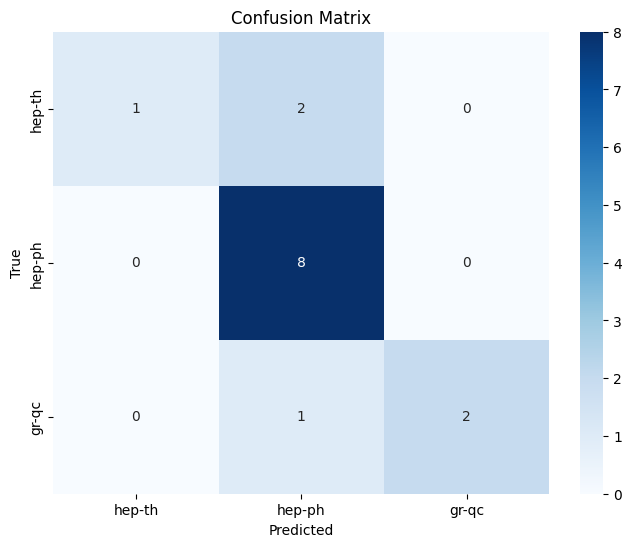

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=target_categories)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_categories, yticklabels=target_categories, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
def show_top_features_per_class(vectorizer, svm_clf, categories, top_n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        coef = svm_clf.coef_[i]
        top_positive_idx = np.argsort(coef)[-top_n:]
        top_negative_idx = np.argsort(coef)[:top_n]

        print(f"\nCategory: {category}")
        print(f"Top {top_n} positive features:")
        print(feature_names[top_positive_idx][::-1])

        print(f"Top {top_n} negative features:")
        print(feature_names[top_negative_idx])

In [12]:
show_top_features_per_class(vectorizer, svm_clf, target_categories, top_n=15)


Category: hep-th
Top 15 positive features:
['ac' 'black' 'phi' 'star' 'black hole' 'hole' 'thermodynamic' 'bh' 'cs'
 'mode' 'constant' 'beta_5' 'excitation' 'shadow' 'cosmological constant']
Top 15 negative features:
['dark' 'symmetry' 'dark matter' 'quark' 'gamma' 'mass' 'masses'
 'breaking' 'higgs' 'leading' 'corrections' 'scale' 'gauge' 'bar' 'non']

Category: hep-ph
Top 15 positive features:
['axion' 'fb' 'limits' 'dm' 'production' 'neutron' 'search'
 'observed expected' 'section' 'cross section' 'expected' 'cross' 'eo'
 'optical' 'laser']
Top 15 negative features:
['bar' 'corrections' 'black' 'quark' 'theory' 'modes' 'order' 'scale'
 'leading' 'masses' 'h_2' 'ac' 'a_0' 'symmetry' 'study']

Category: gr-qc
Top 15 positive features:
['dark' 'quark' 'masses' 'bar' 'scale' 'dark matter' 'higgs' 'flavour'
 'corrections' 'decays' 'neutrino' 'leading' 'breaking' 'h_2' 'soft']
Top 15 negative features:
['black' 'ac' 'black hole' 'hole' 'method' 'string' 'fb' 'limits' 'gferg'
 'phi' 'sear

In [13]:
def plot_wordcloud_for_class(vectorizer, clf, category_index, category_name, max_words=100):
    feature_names = np.array(vectorizer.get_feature_names_out())
    coef = clf.coef_[category_index]

    word_weights = {feature_names[i]: coef[i] for i in range(len(coef)) if coef[i] > 0}

    wc = WordCloud(width=800, height=400, background_color='white', max_words=max_words)
    wc.generate_from_frequencies(word_weights)

    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud for category: {category_name}", fontsize=16)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

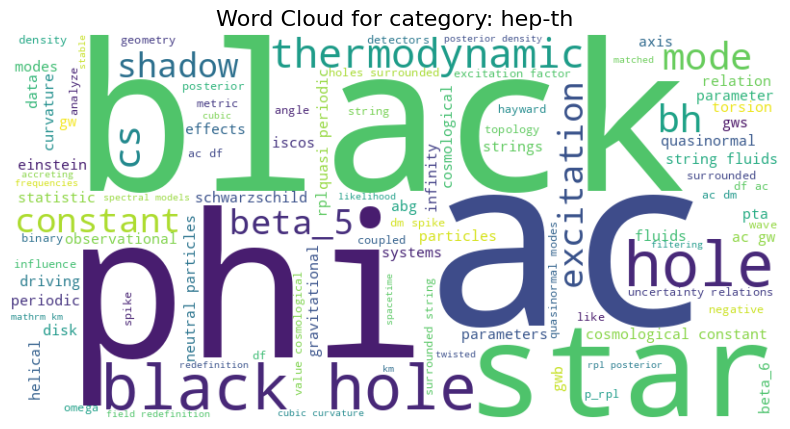

In [14]:
plot_wordcloud_for_class(vectorizer, svm_clf, 0, target_categories[0])